In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['font.family'] = 'SimHei'

df = pd.read_csv('penguins_lter.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [14]:
del df['Comments']
del df['Delta 15 N (o/oo)']
del df['Delta 13 C (o/oo)']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            334 non-null    object 
 1   Sample Number        334 non-null    int64  
 2   Species              334 non-null    object 
 3   Region               334 non-null    object 
 4   Island               334 non-null    object 
 5   Stage                334 non-null    object 
 6   Individual ID        334 non-null    object 
 7   Clutch Completion    334 non-null    object 
 8   Date Egg             334 non-null    object 
 9   Culmen Length (mm)   334 non-null    float64
 10  Culmen Depth (mm)    334 non-null    float64
 11  Flipper Length (mm)  334 non-null    float64
 12  Body Mass (g)        334 non-null    float64
 13  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 39.1+ KB


In [15]:
df['Species'] = df['Species'].str.split().str[0]
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE
5,PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE


1. 直方图绘制

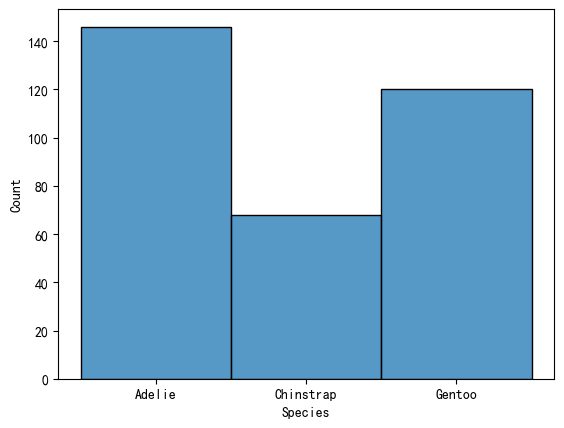

In [16]:
his = sns.histplot(df, x='Species')

2. 核密度估计图（喙长度）

<Axes: xlabel='Culmen Length (mm)', ylabel='Density'>

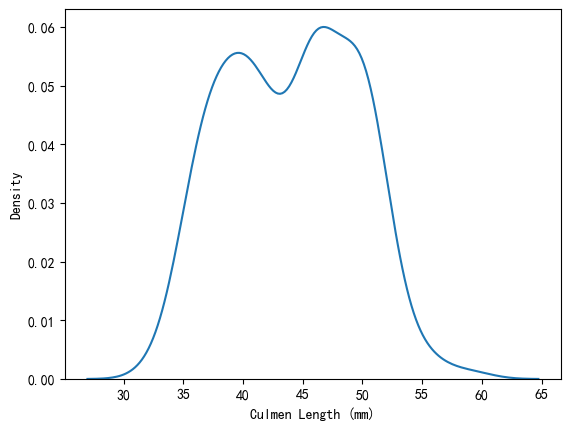

In [17]:
sns.kdeplot(df, x='Culmen Length (mm)')

<Axes: xlabel='Culmen Length (mm)', ylabel='Count'>

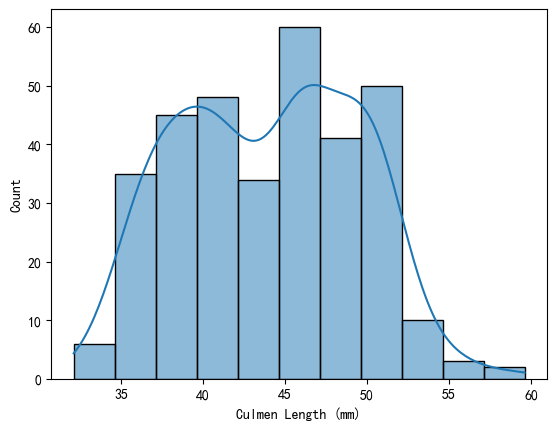

In [18]:
sns.histplot(df, x='Culmen Length (mm)', kde=True)

3. 计数图（绘制不同岛屿企鹅数量的计数图）

<Axes: xlabel='Island', ylabel='count'>

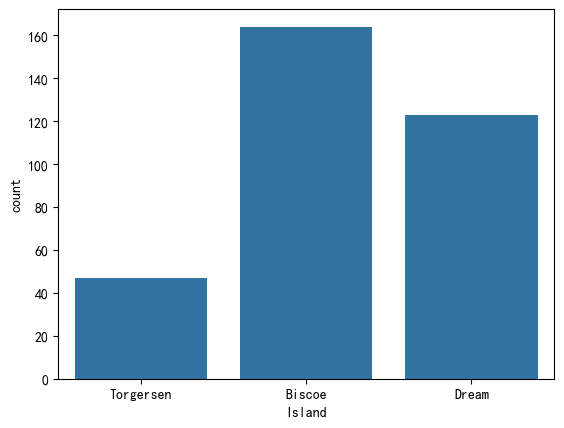

In [19]:
sns.countplot(df, x='Island')

4. 散点图（横轴为体重，纵轴为脚蹼长度。可通过hue参数设置不同组别进行对比）

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

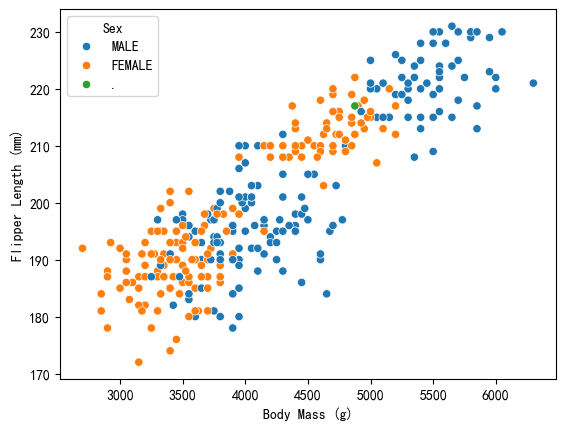

In [20]:
sns.scatterplot(df, x='Body Mass (g)', y='Flipper Length (mm)', hue='Sex')

5. 蜂窝图（通过jointplot()函数，设置kind='hex'来绘制）

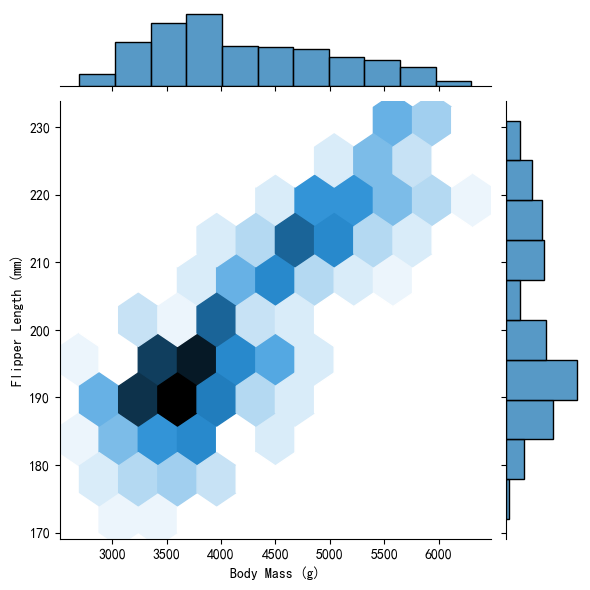

In [22]:
sns.jointplot(df, x='Body Mass (g)', y='Flipper Length (mm)', kind='hex')

6. 二维核密度估计图（通过kdeplot()函数，同时设置x参数和y参数来绘制）

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

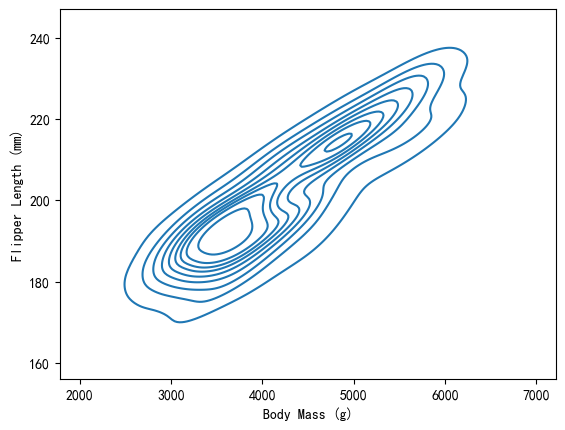

In [25]:
sns.kdeplot(df, x='Body Mass (g)', y='Flipper Length (mm)')

<Axes: xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

C:\anaconda\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\anaconda\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


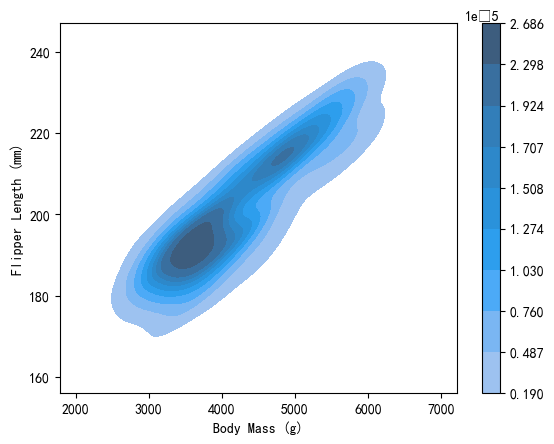

In [26]:
# 通过fill=True设置为填充，通过cbar=True设置颜色示意条
sns.kdeplot(df, x='Body Mass (g)', y='Flipper Length (mm)', fill=True, cbar=True)

7. 条形图

<Axes: xlabel='Species', ylabel='Culmen Length (mm)'>

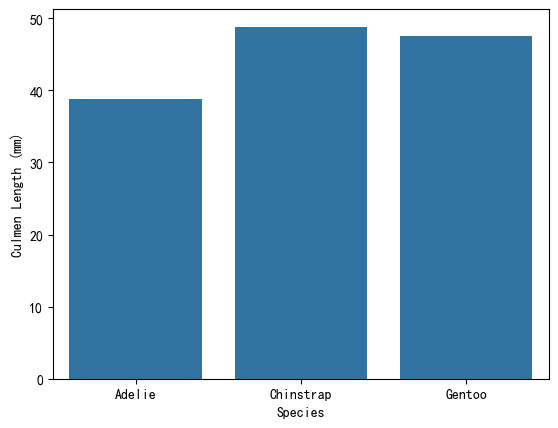

In [28]:
sns.barplot(df, x='Species', y='Culmen Length (mm)', estimator='mean', errorbar=None)

8. 箱线图

<Axes: xlabel='Species', ylabel='Culmen Length (mm)'>

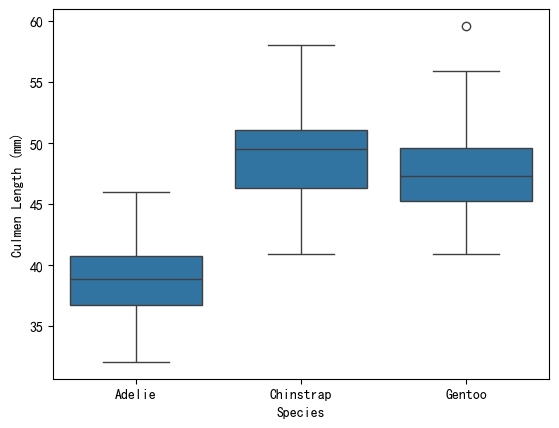

In [29]:
sns.boxplot(df,  x='Species', y='Culmen Length (mm)')

9. 小提琴图

<Axes: xlabel='Species', ylabel='Culmen Length (mm)'>

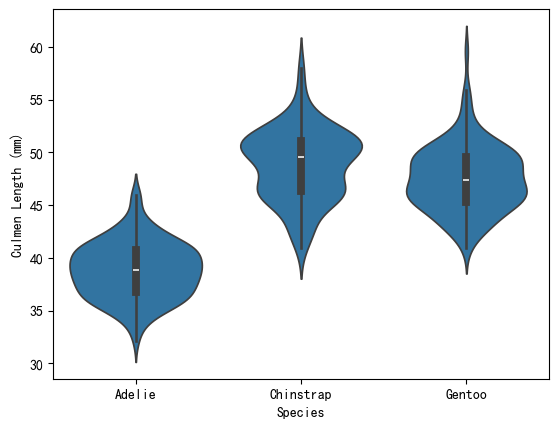

In [30]:
sns.violinplot(df,  x='Species', y='Culmen Length (mm)')

10. 成对关系图

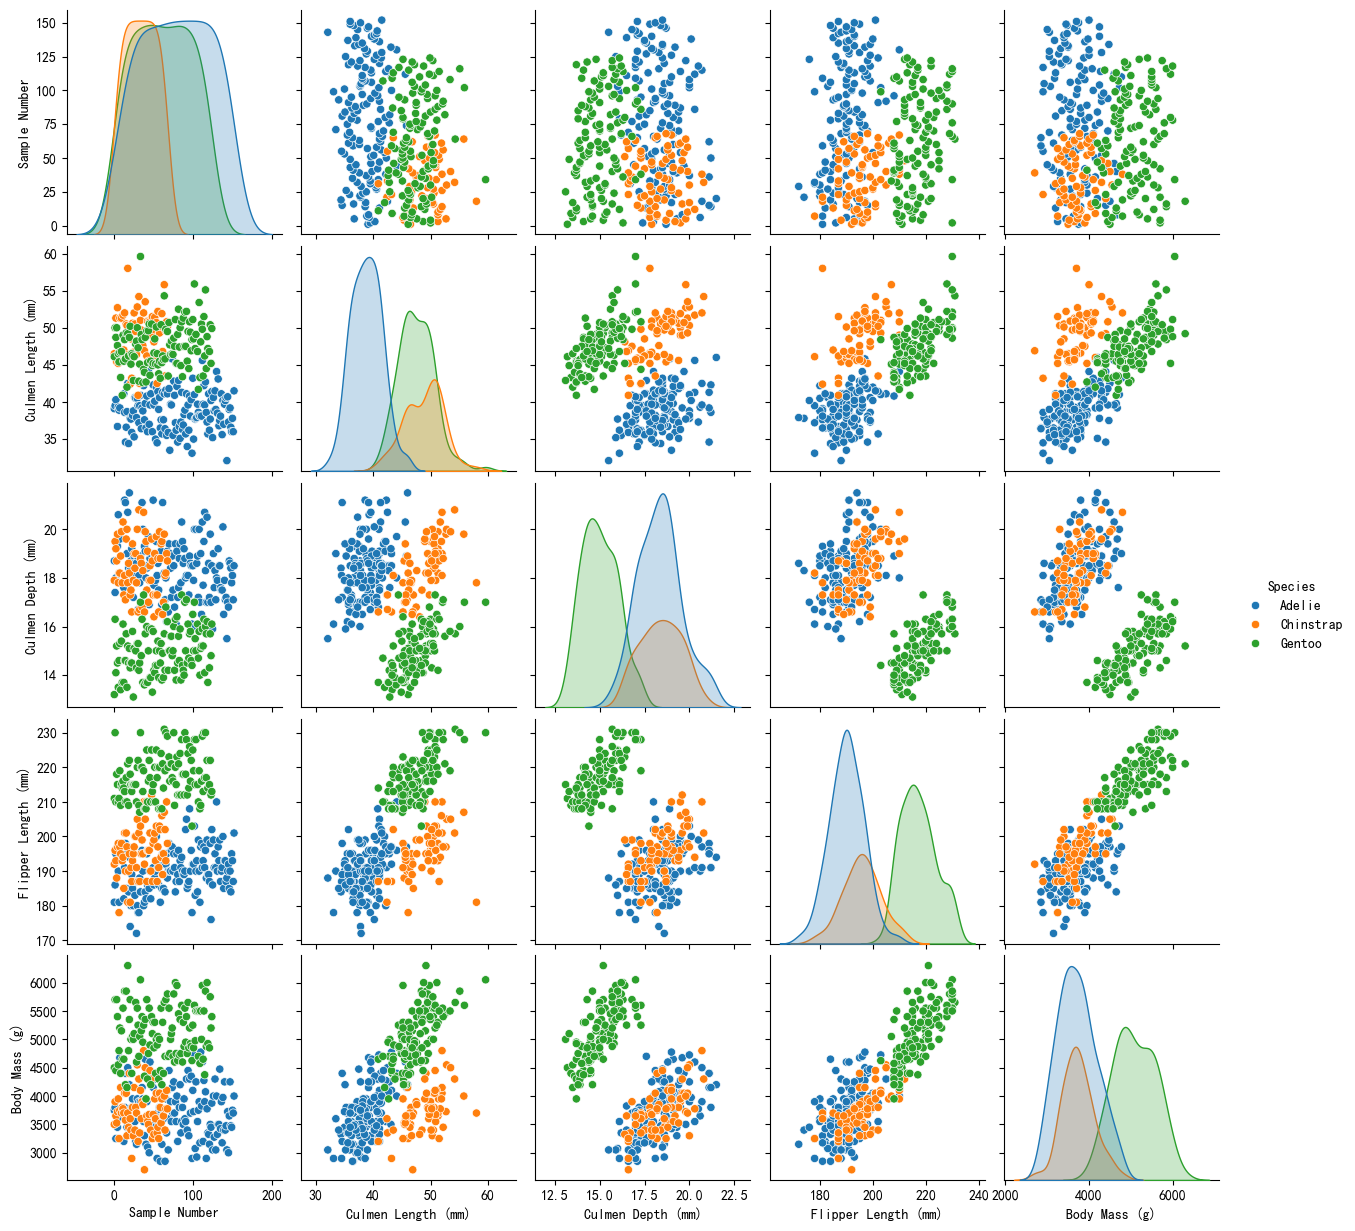

In [31]:
sns.pairplot(df, hue='Species')